## convert the .mat data into the .npy data using the main key value from the main (.mat)  data files and saved in "outputdatapath".

In [1]:
# calling the auxfunction 
import sys
import os
# Define the module path
module_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules"
if not os.path.exists(module_path):
    module_path = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules"

# Add the module path to sys.path if it's not already there
if module_path not in sys.path:
    sys.path.append(module_path)
    
import createmat2npy as mnpy   #  this module load the .mat file,extract data according to the key and convert them into .npy file.
datapath = r'C:\Users\mrafik\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data'
outputdatapath = r'E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1'
if not os.path.exists(datapath and outputdatapath):
    datapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\SharedContents\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data"
    outputdatapath = r'C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\intermdata1'

mnpy.mat2npy(datapath,outputdatapath)



 list of all files: ['aml 2 and 3', 'AML2_cell11.mat', 'AML2_cell11.npy', 'AML3_cell16.mat', 'AML3_cell16.npy', 'basicstatics.py', 'graphene data', 'metdata', 'tmpdata', 'Tomogramma_BuddingYeastCell.mat', 'Tomogramma_BuddingYeastCell.npy', 'Tomogramma_Cell1.mat', 'Tomogramma_Cell1.npy', 'Tomogramma_Cell2.mat', 'Tomogramma_Cell2.npy', 'Tomogramma_Cell3.mat', 'Tomogramma_Cell3.npy', 'tomo_Grafene_24h.mat', 'tomo_Grafene_24h.npy', 'tomo_grafene_48h.mat', 'tomo_grafene_48h.npy', 'yeast cell in various stages', 'yeast_data.csv', '__pycache__']
output directory already exist 

AML2_cell11.mat
Shape of Data: (200, 200, 200)
Data Type: float64
Min Value: 1.3312461759020122
Max Value: 1.3847334887289884
Mean Value: 1.3346517690936042
Standard Deviation: 0.00363229717980464
AML3_cell16.mat
Shape of Data: (200, 200, 200)
Data Type: float64
Min Value: 1.3311161422135425
Max Value: 1.3968166112149256
Mean Value: 1.3347910557041864
Standard Deviation: 0.004951461534242804
Tomogramma_BuddingYeastCell

## A function is defined to load and normalize 3D Numpy data

In [2]:
#  Python Script for Loading & Normalization 
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json

def load_and_normalize_npy(file_path):
    """
    Loads a .npy file and applies Min-Max normalization.
    """
    data = np.load(file_path)  # Load the file
    min_val, max_val = np.min(data), np.max(data)  # Get min-max values
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to [0,1]
    return normalized_data, min_val, max_val


### all different normalized npy array data is stored in the normalized data and Dictionary saved as MATLAB .mat with name as 'all_normalizeddata.mat'

- And seperatley saved the each npy file as .mat format also.(3d matrix format data) and also in "__normalized.npy file"

In [3]:
# Set the directory containing .npy files (update this with your folder path)
import scipy.io as sio
# # datapath = r'C:\Users\mrafik\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data'
# outputdatapath = r'E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\processed'
# if not os.path.exists(outputdatapath):
# #     datapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\SharedContents\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data"
#     outputdatapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\processed"
    
    
data_folder = outputdatapath

npy_files = glob.glob(os.path.join(data_folder, "*.npy"))  # List all .npy files
# Dictionary to store the normalized datasets
normalized_data = {}
data_ranges = {}

# Load and normalize each dataset
for file in npy_files:
    file_name = os.path.basename(file)
    base_name = os.path.splitext(file_name)[0]  # Remove .npy extension

    data, min_val, max_val = load_and_normalize_npy(file)  # data --> normalized data return by above function.
    normalized_data[file_name] = data  # Store in dictionary
    data_ranges[file_name] = (min_val, max_val)  # Store original data range
    print(f"Loaded and normalized {file_name} - Min: {min_val}, Max: {max_val}")

     # Save normalized data as .mat (MATLAB format)
    mat_save_path = os.path.join(data_folder, f"{base_name}_normalized.mat")
    sio.savemat(mat_save_path, {base_name: data})
    print(f"📂 Saved: {mat_save_path}")
 # Save normalized data as .npy numpy array.
    save_path = os.path.join(data_folder,  f"{base_name}_normalized.npy")  # Keep same filename
    np.save(save_path, data)
    print(f"✅ Saved as npy file: {save_path} | Min: {min_val:.4f} | Max: {max_val:.4f}")


data_dict_npy = normalized_data  # all different normalized npy array data is stored in the normalized data 

# Save dictionary as `.mat`
mat_path = os.path.join(data_folder, "all_normalizeddata.mat")
sio.savemat(mat_path, data_dict_npy)
print(f"Dictionary saved as MATLAB .mat: {mat_path}")

# # Load dictionary from `.mat`
# loaded_mat = sio.loadmat(mat_path)


Loaded and normalized AML2_cell11.npy - Min: 1.3312461759020122, Max: 1.3847334887289884
📂 Saved: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1\AML2_cell11_normalized.mat
✅ Saved as npy file: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1\AML2_cell11_normalized.npy | Min: 1.3312 | Max: 1.3847
Loaded and normalized AML3_cell16.npy - Min: 1.3311161422135425, Max: 1.3968166112149256
📂 Saved: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1\AML3_cell16_normalized.mat
✅ Saved as npy file: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1\AML3_cell16_normalized.npy | Min: 1.3311 | Max: 1.3968
Loaded and normalized Tomogramma_BuddingYeastCell.npy - Min: 1.334, Max: 1.457687633726775
📂 Saved: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\intermdata1\Tomogramma_BuddingYeastCell_normalized.mat
✅ Saved as npy file: E:\Projects\substru

###  below The code plot the histogram of normalize data 

module path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules

 data key :AML2_cell11.npy


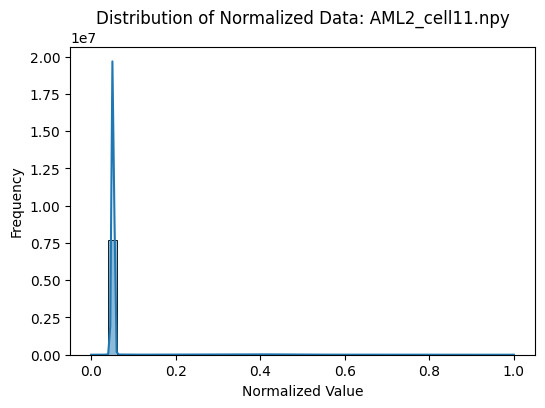


 data key :AML3_cell16.npy


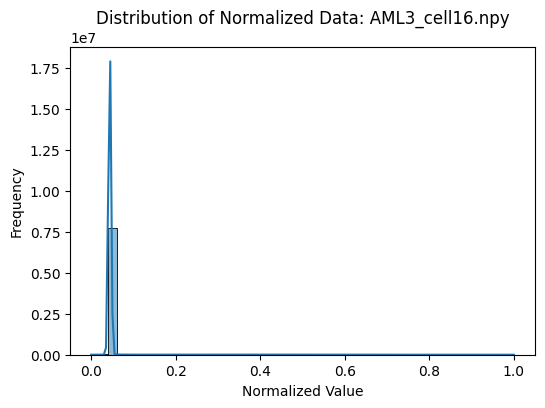


 data key :Tomogramma_BuddingYeastCell.npy


KeyboardInterrupt: 

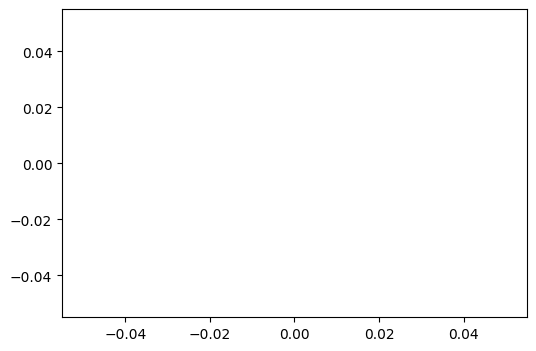

In [4]:
import sys
import os
module_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules"
if not os.path.exists(module_path):
    print(f" i am looking for the Gaetano sys path")
    module_path = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules"
    
# Add the module path to sys.path if it's nat already there
print(f"module path: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from histogramplot import plot_normalizedata_hist
# from plot3dint import plot3dinteractive

for keyval in normalized_data:
    datakey = keyval
    print(f"\n data key :{datakey}")
    dataval = normalized_data[datakey]
    voldata=dataval
    keyvalue = datakey
    # plot3dinteractive(voldata,keyvalue)
    plot_normalizedata_hist(dataval,datakey)

## Step 2: Feature Extraction & Quantile-Based Thresholding
- Now that your 3D datasets are normalized, we will proceed with Feature Extraction & Quantile-Based Thresholding to identify meaningful substructures.
###  Why This Step is Important?
- Feature Extraction helps in understanding the distribution of voxel intensities.
- Quantile-Based Thresholding helps to filter noise and identify significant regions in the dataset.

## - What I Will Do?

-  Step 1: Extract statistical features (mean, variance, quantiles)
-  Step 2: Apply Quantile-Based Thresholding (0.95, 0.99 quantiles)
-  Step 3: Visualize the thresholded regions in 3D slices




module path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules
AML2_cell11_normalized.npy: Mean=0.0637, Std Dev=0.0679, Q95=0.0515, Q99=0.4434


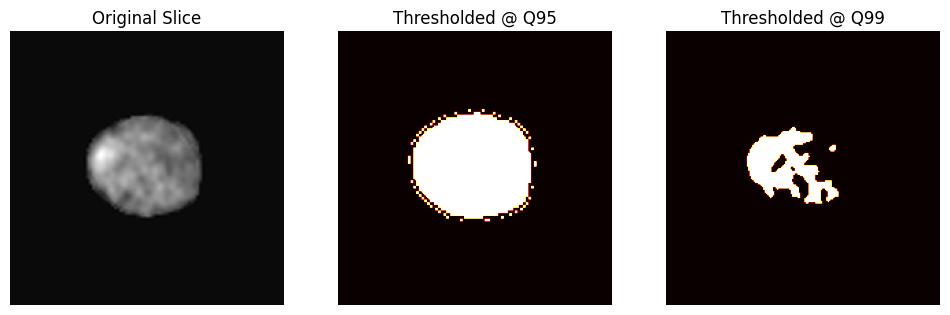

AML3_cell16_normalized.npy: Mean=0.0559, Std Dev=0.0754, Q95=0.0439, Q99=0.4803


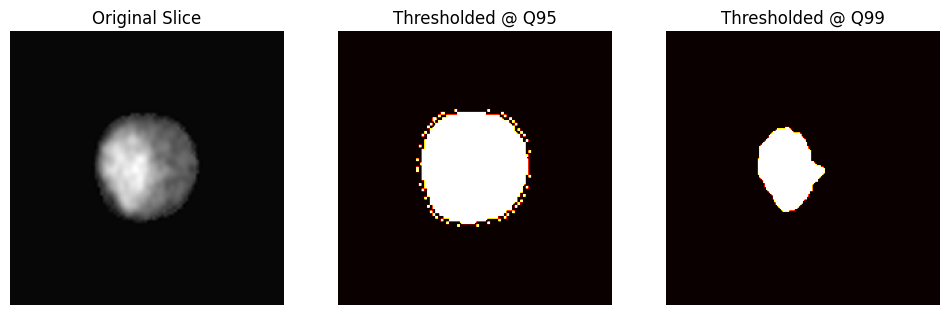

Tomogramma_BuddingYeastCell_normalized.npy: Mean=0.0051, Std Dev=0.0456, Q95=0.0000, Q99=0.2749


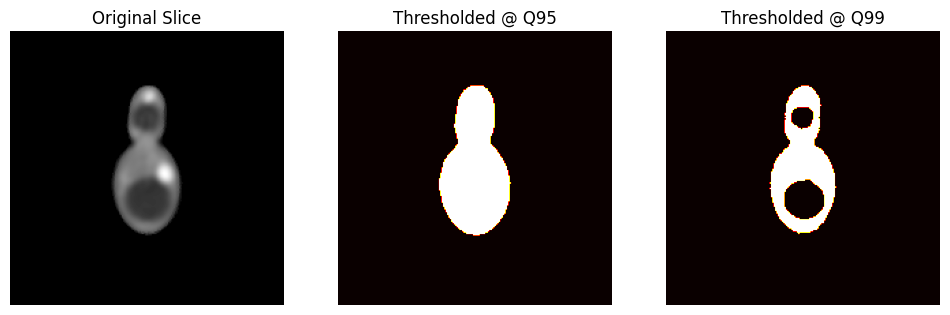

Tomogramma_Cell1_normalized.npy: Mean=0.0052, Std Dev=0.0443, Q95=0.0000, Q99=0.2703


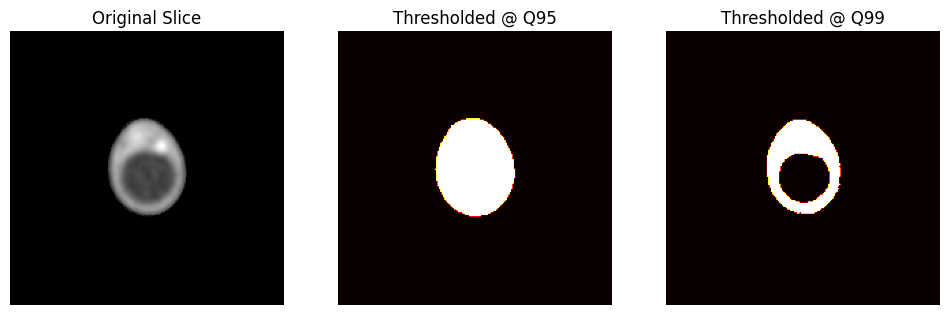

Tomogramma_Cell2_normalized.npy: Mean=0.0043, Std Dev=0.0421, Q95=0.0000, Q99=0.2166


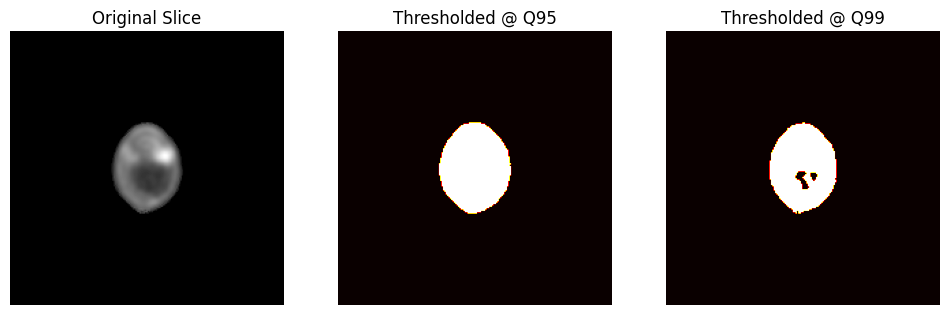

Tomogramma_Cell3_normalized.npy: Mean=0.0057, Std Dev=0.0508, Q95=0.0000, Q99=0.2945


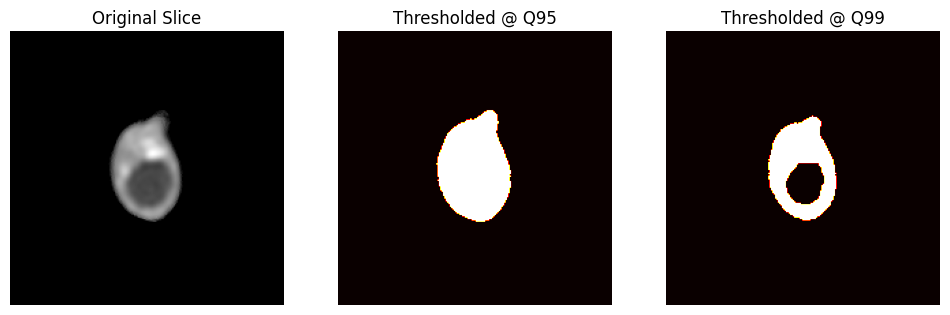

tomo_Grafene_24h_normalized.npy: Mean=0.1049, Std Dev=0.1968, Q95=0.4977, Q99=0.5749


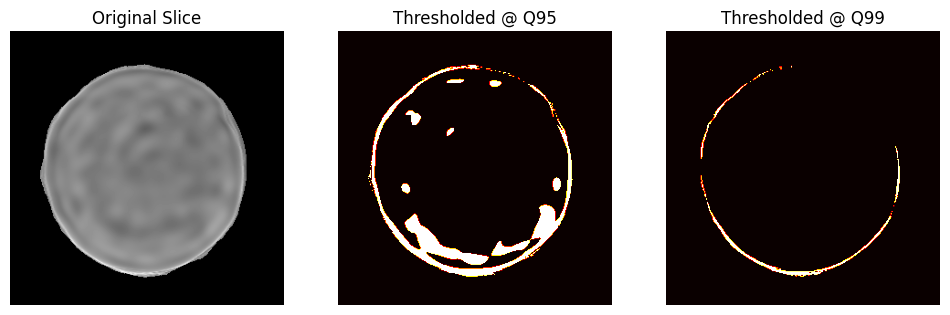

tomo_grafene_48h_normalized.npy: Mean=0.2484, Std Dev=0.0289, Q95=0.3050, Q99=0.3688


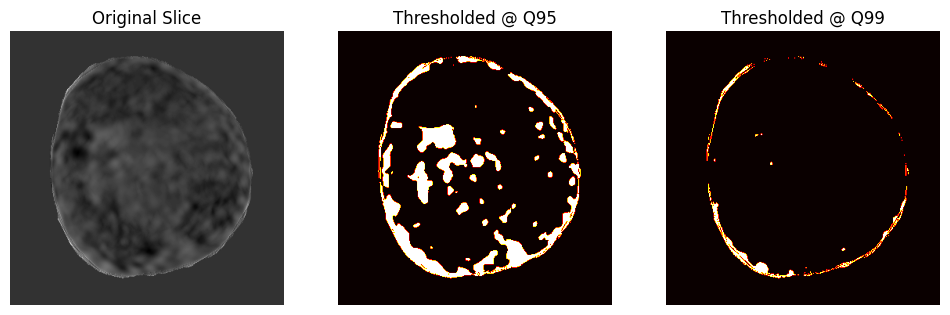

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

import sys
import os
module_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules"

if not os.path.exists(module_path):
    print(f" i am looking for the Gaetano sys path")
    module_path = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules"
    
# Add the module path to sys.path if it's nat already there
print(f"module path: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from listspecificfiles import readlistFiles
keyword = 'normalized.npy'
dataset_names = readlistFiles(outputdatapath,keyword=keyword)
    
from scipy.ndimage import gaussian_filter

# Load the normalized datasets
data_folder =  outputdatapath # Update this to your normalized npy fileslocation
# dataset_names = ["AML2_cell11.npy", "AML3_cell16.npy", "tomo_Grafene_24h.npy",
#                  "tomo_Grafene_48h.npy", "Tomogramma_BuddingYeastCell.npy",
#                  "Tomogramma_Cell1.npy", "Tomogramma_Cell2.npy", "Tomogramma_Cell3.npy"]

# dataset_names = readlistFiles
# print(f"enable to see the all dataset names: {dataset_names}")

# Function to load saved normalized data
def load_normalized_data(filename):
    return np.load(f"{data_folder}/{filename}")

# Function to extract statistical features
def extract_features(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    q95 = np.quantile(data, 0.95)
    q99 = np.quantile(data, 0.99)
    return mean_val, std_dev, q95, q99

# Function to to apply threshold and visualize the data after masking
def visualizethres(dataset):
        # Select a dataset for visualization
    selected_dataset = dataset
    data = load_normalized_data(selected_dataset)

    # Apply Quantile-Based Thresholding
    q95_threshold = features[selected_dataset]["Q95"]
    q99_threshold = features[selected_dataset]["Q99"]

    # Create binary masks based on quantile thresholds
    mask_q95 = data > q95_threshold  # Region above 95th percentile
    mask_q99 = data > q99_threshold  # Region above 99th percentile

    # Visualizing Slices with Thresholding
    slice_index = data.shape[2] // 2  # Choose middle slice for visualization

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(data[:, :, slice_index], cmap="gray")
    plt.title("Original Slice")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_q95[:, :, slice_index], cmap="hot")
    plt.title("Thresholded @ Q95")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(mask_q99[:, :, slice_index], cmap="hot")
    plt.title("Thresholded @ Q99")
    plt.axis("off")

    plt.show()
    

# Dictionary to store extracted features
features = {}

# Iterate through all datasets
for dataset in dataset_names:
    data = load_normalized_data(dataset)  # Load dataset
    mean_val, std_dev, q95, q99 = extract_features(data)  # Extract features
    features[dataset] = {"Mean": mean_val, "Std Dev": std_dev, "Q95": q95, "Q99": q99}
    print(f"{dataset}: Mean={mean_val:.4f}, Std Dev={std_dev:.4f}, Q95={q95:.4f}, Q99={q99:.4f}")
    visualizethres(dataset)
    
    
# # Select a dataset for visualization
# selected_dataset = dataset_names[0]  # Change this for other datasets
# data = load_normalized_data(selected_dataset)

# # Apply Quantile-Based Thresholding
# q95_threshold = features[selected_dataset]["Q95"]
# q99_threshold = features[selected_dataset]["Q99"]

# # Create binary masks based on quantile thresholds
# mask_q95 = data > q95_threshold  # Region above 95th percentile
# mask_q99 = data > q99_threshold  # Region above 99th percentile

# # Visualizing Slices with Thresholding
# slice_index = data.shape[2] // 2  # Choose middle slice for visualization

# plt.figure(figsize=(12, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(data[:, :, slice_index], cmap="gray")
# plt.title("Original Slice")
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.imshow(mask_q95[:, :, slice_index], cmap="hot")
# plt.title("Thresholded @ Q95")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.imshow(mask_q99[:, :, slice_index], cmap="hot")
# plt.title("Thresholded @ Q99")
# plt.axis("off")

# plt.show()


In [ ]:
# import os
# import numpy as np
# import plotly.graph_objects as go
# import gc  # Garbage collector to free memory

# def plot3dinteractive(voldata, keyvalue, output_dir, sample_fraction=0.005):
#     """Plots large 3D NumPy arrays interactively and saves as HTML.
    
#     - `voldata`: Input 3D NumPy array.a
#     - `keyvalue`: Filename for saving.
#     - `output_dir`: Directory to save HTML plots.
#     - `sample_fraction`: Fraction of points to randomly plot.
#     """
#     array_3d = voldata
#     x1, y1, z1 = array_3d.shape
#     print(f"Shape of {keyvalue}: {x1, y1, z1}")

#     # Create a 3D meshgrid
#     x, y, z = np.meshgrid(np.arange(x1), np.arange(y1), np.arange(z1))

#     # Mask non-zero values
#     mask = array_3d > 0
#     x_vals = x[mask].flatten()
#     y_vals = y[mask].flatten()
#     z_vals = z[mask].flatten()
#     values = array_3d[mask].flatten()

#     # **Randomly sample points** to reduce memory usage
#     num_points = len(values)
#     sample_size = int(num_points * sample_fraction)

#     if sample_size > 0:
#         indices = np.random.choice(num_points, sample_size, replace=False)
#         x_vals = x_vals[indices]
#         y_vals = y_vals[indices]
#         z_vals = z_vals[indices]
#         values = values[indices]
#     else:
#         print(f"⚠ Warning: Not enough non-zero points for {keyvalue}. Skipping...")
#         return

#     print(f"Plotting {sample_size} points out of {num_points} ({sample_fraction * 100}% sampled)")

#     # Create a 3D scatter plot
#     fig = go.Figure(data=go.Scatter3d(
#         x=x_vals,
#         y=y_vals,
#         z=z_vals,
#         mode='markers',
#         marker=dict(
#             size=1,
#             color=values,
#             colorscale='Viridis',
#             opacity=0.5
#         )
#     ))

#     # Set axis labels
#     fig.update_layout(scene=dict(
#         xaxis_title='X',
#         yaxis_title='Y',
#         zaxis_title='Z'
#     ))

#     # **Save plot as an interactive HTML file**
#     save_path = os.path.join(output_dir, f"{keyvalue}.html")
#     fig.write_html(save_path)
#     print(f"Saved: {save_path}")

#     # **Clear memory**
#     del fig, x_vals, y_vals, z_vals, values
#     gc.collect()  # Garbage collection to free memory

# # **Directory paths**
# data_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\intermdata1"
# output_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw"

# # **Ensure output directory exists**
# os.makedirs(output_dir, exist_ok=True)

# # **Process all .npy files one by one**
# npy_files = [f for f in os.listdir(data_dir) if f.endswith(".npy")]

# for filename in npy_files:
#     file_path = os.path.join(data_dir, filename)
#     voldata = np.load(file_path)  # Load .npy file
#     plot3dinteractive(voldata, filename, output_dir, sample_fraction=0.04)  # Save & clear memory


In [ ]:
# import os
# import numpy as np
# import plotly.graph_objects as go
# import gc  # Garbage collector to free memory

# def plot3dinteractive(voldata, keyvalue, output_dir, sample_fraction=0.005):
#     """Plots large 3D NumPy arrays interactively and saves as HTML.
    
#     - `voldata`: Input 3D NumPy array.
#     - `keyvalue`: Filename for saving.
#     - `output_dir`: Directory to save HTML plots.
#     - `sample_fraction`: Fraction of points to randomly plot.
#     """
#     array_3d = voldata
#     x1, y1, z1 = array_3d.shape
#     print(f"Shape of {keyvalue}: {x1, y1, z1}")


#     # Create a 3D meshgrid
#     x, y, z = np.meshgrid(np.arange(x1), np.arange(y1), np.arange(z1))

#     # Mask non-zero values
#     mask = array_3d > 0
#     x_vals = x[mask].flatten()
#     y_vals = y[mask].flatten()
#     z_vals = z[mask].flatten()
#     values = array_3d[mask].flatten()

#     # **Randomly sample points** to reduce memory usage
#     num_points = len(values)
#     sample_size = int(num_points * sample_fraction)

#     if sample_size > 0:
#         indices = np.random.choice(num_points, sample_size, replace=False)
#         x_vals = x_vals[indices]
#         y_vals = y_vals[indices]
#         z_vals = z_vals[indices]
#         values = values[indices]
#     else:
#         print(f"⚠ Warning: Not enough non-zero points for {keyvalue}. Skipping...")
#         return

#     print(f"Plotting {sample_size} points out of {num_points} ({sample_fraction * 100}% sampled)")

#     # **Enhanced Color Grading**
#     colorscale = [
#         [0.0, "white"],    # Outer structure (light color)
#         [0.2, "lightblue"],
#         [0.4, "deepskyblue"],
#         [0.6, "dodgerblue"],
#         [0.8, "blue"],      # Middle layers
#         [1.0, "darkblue"]   # Deep inner structure (dark color)
#     ]

#     # Create a 3D scatter plot
#     fig = go.Figure(data=go.Scatter3d(
#         x=x_vals,
#         y=y_vals,
#         z=z_vals,
#         mode='markers',
#         marker=dict(
#             size=2,
#             color=values,
#             colorscale=colorscale,
#             opacity=0.5
#         )
#     ))

#     # Set axis labels and layout
#     fig.update_layout(
#         title=f"3D Structure: {keyvalue}",
#         scene=dict(
#             xaxis_title='X',
#             yaxis_title='Y',
#             zaxis_title='Z',
#             bgcolor="black"  # Dark background for better contrast
#         )
#     )

#     # **Save plot as an interactive HTML file**
#     save_path = os.path.join(output_dir, f"{keyvalue}.html")
#     fig.write_html(save_path)
#     print(f" Saved: {save_path}")

#     # **Clear memory**
#     del fig, x_vals, y_vals, z_vals, values
#     gc.collect()  # Garbage collection to free memory

# # **Directory paths**
# data_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\intermdata1"
# output_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw"

# # **Ensure output directory exists**
# os.makedirs(output_dir, exist_ok=True)

# # **Process all .npy files one by one**
# npy_files = [f for f in os.listdir(data_dir) if f.endswith(".npy")]

# for filename in npy_files:
#     file_path = os.path.join(data_dir, filename)
#     voldata = np.load(file_path)  # Load .npy file
#     plot3dinteractive(voldata, filename, output_dir, sample_fraction=0.05)  # Save & clear memory
